In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Ler os arquivos CSV usando a codificação ISO-8859-1
train_data = pd.read_csv('/content/drive/MyDrive/NLP/disaster/train.csv', encoding='ISO-8859-1')
test_data = pd.read_csv('/content/drive/MyDrive/NLP/disaster/test.csv', encoding='ISO-8859-1')

Mounted at /content/drive


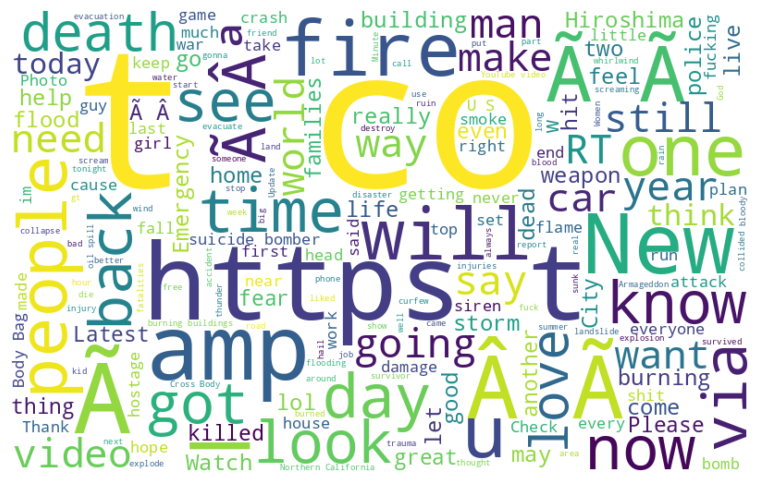

In [ ]:
#display(train_data)
#display(test_data)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Agregar todo o texto da coluna 'text'
text_data = ' '.join(train_data['text'])

# Gerar a Word Cloud
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text_data)

# Plotar a Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Inicializar o CountVectorizer
stop_words_custom = ['http', 'https']
all_stop_words = stop_words_custom + list(ENGLISH_STOP_WORDS)
vectorizer = CountVectorizer(stop_words=all_stop_words, max_features=5000)

# Transformar o texto em um Bag of Words
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['target']

X_test = vectorizer.transform(test_data['text'])




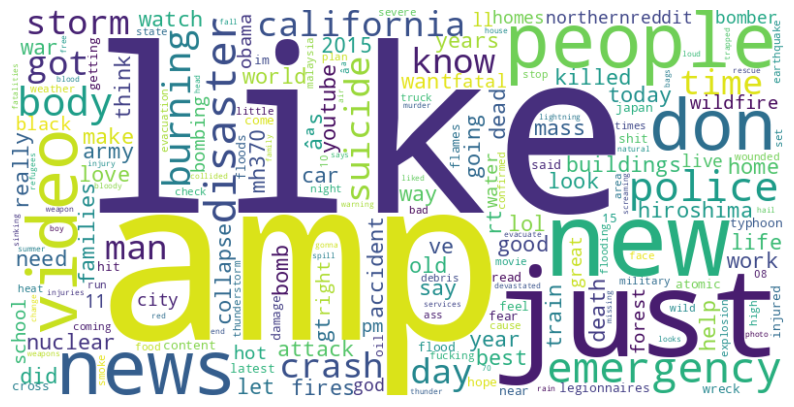

In [ ]:
# 1. Recuperar o vocabulário do CountVectorizer
vocab = vectorizer.get_feature_names_out()

# 2. Somar as ocorrências de cada palavra
word_counts = X_train.sum(axis=0).tolist()[0]

# 3. Criar um dicionário com a contagem total de cada palavra
word_count_dict = dict(zip(vocab, word_counts))

# 4. Gerar a Word Cloud usando o dicionário
wordcloud_filtered = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotar a Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Inicializar o MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de treinamento para verificar a acurácia
train_predictions = clf.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Acurácia no conjunto de treinamento: {accuracy * 100:.2f}%")

test_predictions = clf.predict(vectorizer.transform(test_data['text']))
submission = pd.DataFrame({'id': test_data['id'], 'target': test_predictions})
submission.to_csv('/content/drive/MyDrive/NLP/disaster/submission.csv', index=False)


Iteration 1, loss = 0.65158240
Iteration 2, loss = 0.51041590
Iteration 3, loss = 0.41030167
Iteration 4, loss = 0.35822324
Iteration 5, loss = 0.32648428
Iteration 6, loss = 0.29615629
Iteration 7, loss = 0.27802283
Iteration 8, loss = 0.25831005
Iteration 9, loss = 0.23797381
Iteration 10, loss = 0.23106138
Iteration 11, loss = 0.21122436
Iteration 12, loss = 0.20218274
Iteration 13, loss = 0.18381551
Iteration 14, loss = 0.18694614
Iteration 15, loss = 0.17627373
Iteration 16, loss = 0.16450439
Iteration 17, loss = 0.15218632
Iteration 18, loss = 0.14768994
Iteration 19, loss = 0.13867467
Iteration 20, loss = 0.14401104
Iteration 21, loss = 0.13507190
Iteration 22, loss = 0.12476475
Iteration 23, loss = 0.13643364
Iteration 24, loss = 0.12186068
Iteration 25, loss = 0.12689613
Iteration 26, loss = 0.11203149
Iteration 27, loss = 0.10608301
Iteration 28, loss = 0.10307077
Iteration 29, loss = 0.10072470
Iteration 30, loss = 0.09483167
Iteration 31, loss = 0.09265533
Iteration 32, los

Deu 77% de accuracy no Kaggle